In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel = "ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

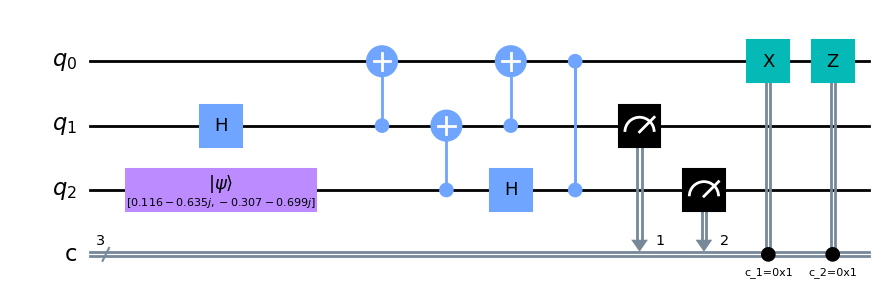

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange

import qiskit.quantum_info as qi

random_state = qi.random_statevector(2)

qtc = QuantumCircuit(3,3) # quantum teleportation circuit

qtc.initialize(random_state,2)

qtc.h(1)
qtc.cx(1,0)
qtc.cx(2,1)
qtc.h(2)
qtc.cx(1,0)
qtc.cz(2,0)

qtc.measure(1,1)
qtc.measure(2,2)

qtc.x(0).c_if(1,1) # apply x gate if bit 1 is set to 1
qtc.z(0).c_if(2,1) # apply z gate if bit 2 is set to 1

simulator = Aer.get_backend('statevector_simulator')
job = execute(qtc, simulator)
result = job.result()
statevector = result.get_statevector()

display(qtc.draw(output='mpl'))

In [3]:
# Print the statevector
print("Statevector:")
print(statevector)

Statevector:
Statevector([ 0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        , -0.        +0.j        ,
              0.11613143-0.63479583j,  0.30734144+0.69934898j,
              0.        +0.j        , -0.        +0.j        ],
            dims=(2, 2, 2))


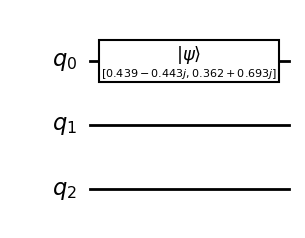

<IPython.core.display.Latex object>

In [4]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, execute
import qiskit.quantum_info as qi

random_state = qi.random_statevector(2)

qc = QuantumCircuit(3)
qc.initialize(random_state, 0)

display(qc.draw(output='mpl',style='bw'))

# Simulate the circuit and obtain the statevector
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector()

statevector.draw('latex')